# Определение возраста покупателей

**Цель проекта:**

Предсказать возраст покупателей

## Описание проекта

**Импорт библиотек.**

**Исследовательский анализ данных**

Загружены данные:
* Данные, типы данных соответствуют описанию. 
* Пропуски отсутствуют.

Проведен исследовательский анализ данных:
* Гистограмма распределения признака
* Диаграмма размаха
* Напечатаны примеры изображений

**Обучение модели**

Для решения задачи выбрана модель ResNet50.
Обучение модели выполнено в тренажере.
Приведены результаты обучения.

**Анализ обученной модели**

## Импорт библиотек

In [4]:
# Импорты

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D, GlobalAveragePooling2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50

from PIL import Image 

## Исследовательский анализ данных

In [5]:
path = '/datasets/faces/'

In [6]:
# Загрузим данные

df = pd.read_csv(path + 'labels.csv')

In [7]:
# Выведем первые 5 строк

df.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [8]:
# Общая информация о файле

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


У нас 2 колонки: с изображением и с реальным возрастом. Все данные заполнены, пропусков нет, типы данных соответствуют описанию.

In [9]:
df.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


Возраст от 1 до 100 лет. 25% выборки - до 20 лет , 50% - до 29 лет, 75% - до 41 года. Средний возраст 31,2 года.

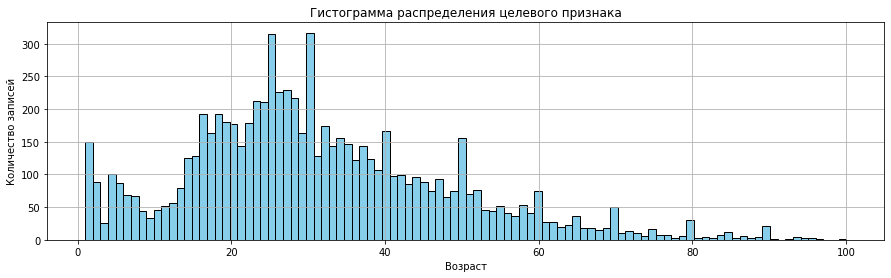

In [10]:
# Гистограмма распределения целевого признака

plt.figure(figsize=(15,4))
df['real_age'].hist(bins=100, color='SkyBlue', edgecolor='black')
plt.title('Гистограмма распределения целевого признака')
plt.xlabel('Возраст')
plt.ylabel('Количество записей');

На гистограмме мы видим пики значений в возрастах, кратных 5: 25, 30, 40, 50, 60, 65, 70 и тд.

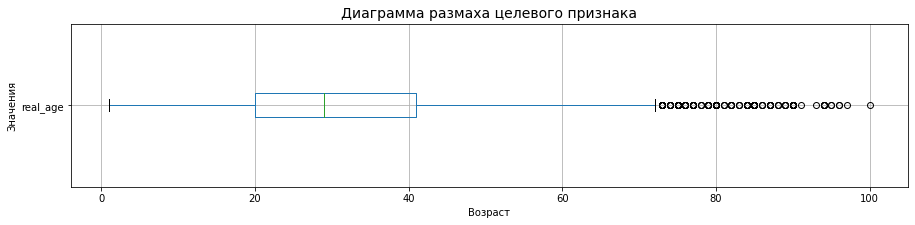

In [11]:
# Построим диаграмму размаха

fig, ax = plt.subplots(figsize = (15,3))
ax = df.boxplot(vert = False, ax = ax)
ax.set_title('Диаграмма размаха целевого признака', size = 14)
ax.set_xlabel('Возраст')
ax.set_ylabel('Значения');

Диаграмма размаха показывает, что возраст выше ~ 73 лет не типичен для выборки.

Но удалять данные отсюда, конечно, не следует, иначе модель не будет иметь примеров этих возрастов.

In [12]:
# Инициализируем генератор изображений, и сразу приведем к масштабу [0, 1]

datagen = ImageDataGenerator(rescale=1./255)

In [13]:
# Создадим генератор для тренировочной выборки

train_datagen_flow = datagen.flow_from_directory(path)

Found 7591 images belonging to 1 classes.


In [14]:
# Зададим признаки и целевую  характеристику

features, target = next(train_datagen_flow)

In [15]:
# Проверим размеры объектов с признаками и целевой характеристикой

print(f'Признаки: {features.shape}')
print(f'Целевая характеристика: {target.shape}')

Признаки: (32, 256, 256, 3)
Целевая характеристика: (32, 1)


У нас 32 изображения размером 256 х 256 3х цветов.

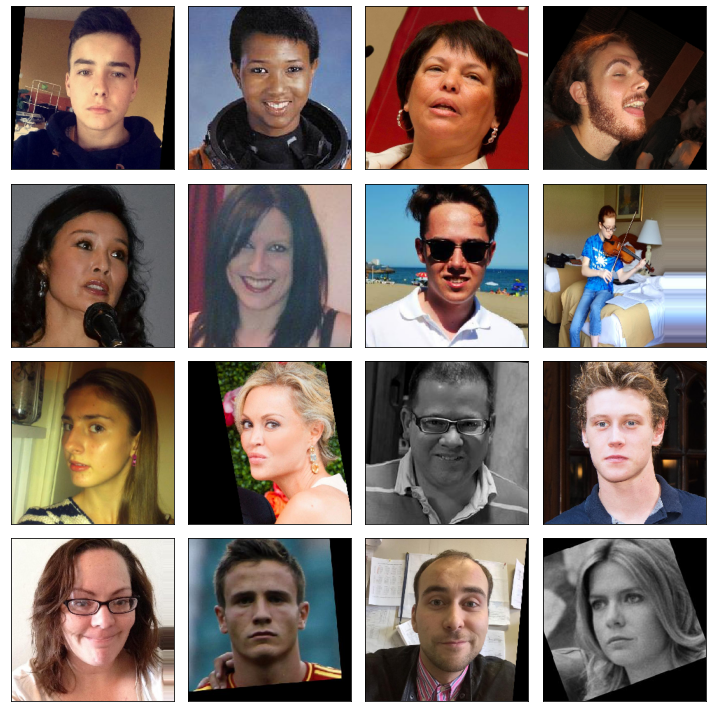

In [33]:
# Выведем 16 изображений

fig = plt.figure(figsize=(10,10))
for i in range(16):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])

    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

Посмотрим на несколько примеров изображений с возрастом

Изображение: 000000.jpg
Возраст: 4
Размерность: (114, 114, 3)


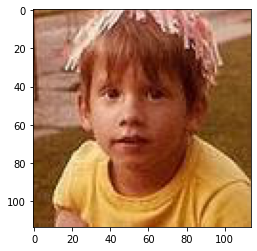

Изображение: 000001.jpg
Возраст: 18
Размерность: (784, 784, 3)


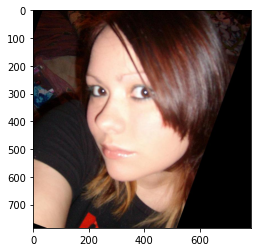

Изображение: 000002.jpg
Возраст: 80
Размерность: (133, 133, 3)


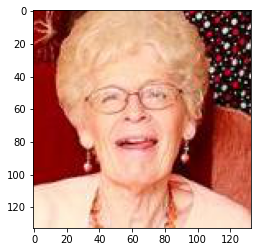

In [50]:
for i in range(0, 3):
    
    item = path + 'final_files/' + df.file_name.loc[i]
    
    image = Image.open(item)
    image_array = np.array(image)
    
    print(f'Изображение: {df.file_name.loc[i]}')
    print(f'Возраст: {df.real_age.loc[i]}')
    print(f'Размерность: {image_array.shape}')
    
    plt.imshow(image_array) 
    plt.show()

**Вывод:**

* В Датасете 7591 изображений, что вполне достаточно для обучения и тестирования модели.
* Минимальный возраст = 1 год, максимальный = 100 лет. Среднее значение возраста = 31,2 года. При этом 50% значений находятся в пределах от 20 до 41 года. В данных есть всплески значений в возрастах, кратных 5. Возможно, это может ухудшить предсказания модели, но удалить данные мы не можем, чтобы не потерять эти возраста.
* Изображения представляют по большей части портреты людей, как в цветном, так и в черно-белом варианте. Вероятно, портретные фотографии более удачны для предсказания возраста, нежели изображения в полный рост и в движении.
* Изображения имеют разную размерность.
* В качестве аугментаций стоит использовать вертикальные и горизонтальные флипы, возможно, ротацию (в нашем варианте она не будет применяться, чтобы сократить время использования сервера). Растягивания изображений для нашей задачи не годятся.


## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python


import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd

import tensorflow.keras as keras 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AveragePooling2D, GlobalAveragePooling2D 

from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.applications.resnet import ResNet50 

def load_train(path): 
    train_datagen = ImageDataGenerator(rescale=1./255, 
                                 horizontal_flip=True, 
                                 validation_split = 0.25
                                 #vertical_flip=True 
                                 #rotation_range=90, 
                                 #width_shift_range=0.2, 
                                 #height_shift_range=0.2 
                                ) 
   
    train_datagen_flow = train_datagen.flow_from_dataframe( 
                                                     dataframe=pd.read_csv(path + 'labels.csv'), 
                                                     directory=path + 'final_files/', 
                                                     x_col='file_name', 
                                                     y_col='real_age', 
                                                     target_size=(224, 224),  
                                                     batch_size=32, 
                                                     class_mode='raw',
                                                     subset='training',
                                                     seed=12345
                                                     ) 
            
    return train_datagen_flow 

def load_test(path): 
    validation_datagen = ImageDataGenerator(rescale=1./255,
                                            validation_split = 0.25
                                ) 
   
    validation_datagen_flow = validation_datagen.flow_from_dataframe( 
                                                     dataframe=pd.read_csv(path + 'labels.csv'),  
                                                     directory=path + 'final_files/', 
                                                     x_col='file_name', 
                                                     y_col='real_age', 
                                                     target_size=(224, 224), 
                                                     batch_size=32,  
                                                     class_mode='raw',
                                                     subset='validation',
                                                     seed=12345
                                                     ) 
            
    return validation_datagen_flow 

def create_model(input_shape): 
   
    backbone = ResNet50(input_shape=(224,224,3),
                        include_top=False,                
                        weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
                        #weights='imagenet'
                       ) 
    
    model = Sequential() 
    model.add(backbone) 
    model.add(GlobalAveragePooling2D()) 
    model.add(Dense(1, activation='relu'))  
    
    model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.00035), metrics=['mae']) 

    model.summary() 
   
    return model 

def train_model(model, 
                train_data, 
                test_data, 
                batch_size=None, 
                epochs=10, 
                steps_per_epoch=None, 
                validation_steps=None,
                verbose=2
                ):
   
    if steps_per_epoch is None: 
                  steps_per_epoch=len(train_data) 
    if validation_steps is None: 
                  validation_steps=len(test_data) 
       
    model.fit(train_data, 
              validation_data=test_data, 
              batch_size=batch_size, 
              epochs=epochs,
              steps_per_epoch=steps_per_epoch, 
              validation_steps=validation_steps, 
              verbose=verbose 
              ) 

    return model  
```

```

# < скопируйте результат вывода на экран сюда >
# < длинные строки со скачиванием модели можно удалить >

....
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
=================================================================
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 178 steps, validate for 60 steps
Epoch 1/10
2024-04-26 05:32:53.016392: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2024-04-26 05:32:54.145522: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 63s - loss: 201.8250 - mae: 10.5974 - val_loss: 329.3055 - val_mae: 13.4475
Epoch 2/10
178/178 - 38s - loss: 100.7307 - mae: 7.5985 - val_loss: 460.3320 - val_mae: 16.3669
Epoch 3/10
178/178 - 39s - loss: 78.9366 - mae: 6.7580 - val_loss: 319.0843 - val_mae: 13.3084
Epoch 4/10
178/178 - 39s - loss: 57.3884 - mae: 5.7856 - val_loss: 150.7269 - val_mae: 9.1515
Epoch 5/10
178/178 - 39s - loss: 45.8502 - mae: 5.1737 - val_loss: 99.2789 - val_mae: 7.3926
Epoch 6/10
178/178 - 39s - loss: 36.8698 - mae: 4.5945 - val_loss: 90.9660 - val_mae: 7.4207
Epoch 7/10
178/178 - 38s - loss: 30.5467 - mae: 4.2101 - val_loss: 76.8919 - val_mae: 6.5001
Epoch 8/10
178/178 - 39s - loss: 25.8165 - mae: 3.9042 - val_loss: 93.2519 - val_mae: 7.0834
Epoch 9/10
178/178 - 38s - loss: 23.3526 - mae: 3.6629 - val_loss: 82.9203 - val_mae: 6.5839
Epoch 10/10
178/178 - 39s - loss: 17.9648 - mae: 3.2697 - val_loss: 70.8205 - val_mae: 6.2904
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
60/60 - 10s - loss: 70.8205 - mae: 6.2904
Test MAE: 6.2904

```


На 10 эпохах с шагом обучения lr=0.00035 метрика модели соответствует заданию: "...если вы получите MAE меньше 7, это будет отличный результат!"

## Анализ обученной модели

* Для решения задачи была обучена модель ResNet50
* Применена архитектура модели: backbone (без заморозки) + Top
* В модели использованы предобученные веса *
* Параметры обучения:
 - размер батча = 32
 - оптимизатор = Adam
 - шаг обучения = 0.00035
 - число эпох = 10

На мой взгляд, есть легкая степень переобучения модели, тк. на обучающей выборке метрики ниже, чем на валидационной.

Метрика МАЕ модели = 6,29 на 10 эпохах, что соответствует условию задачи.

(*  весами weights='imagenet метрика была незначительно лучше 6,15 на 10 эпохах. это был предыдущий вариант)